


![GettingStarted](https://mooc-styleguide.s3.amazonaws.com/MOOC-Styles/Active+Learning+Headers/Links/ALH_GettingStarted.png)
#[Step 1] **READ**: Simple Fashion Goods Recognition with Neural Network
# **Objective**
#### CNN model for image classification

We will implement a model to classify the images of retail products (predict and label the images in 10 classes such as dress, coat, or shirt).

#[Step 2] **RUN**: Setting Up the Colab Environment

**Importing Packages**

Python packages enable different functions, providing easy ways of manipulating data and building models. As a first step, we 'import' packages to set up our environment in a way that allows us to take advantage of different capabilities.

Import the necessary libraries and print the version of TensorFlow API:

In [1]:
# TensorFlow and tf.keras
# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/Users/piyush/workspace/projects/DeepLearning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


2.18.0



**Loading Dataset**
<br>
Next we need to load the Fashion MNIST dataset and reshape it so that it is suitable for use training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height].

In this case, since our dataset is in grey scale, the pixel dimension is set to 1.

We will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. The following are some examples of the images (each image is 28 x 28 pixels):

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Import and load the data from TensorFow (the data is already split into test and training sets):

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# train_images.shape

**Data Overview**
<br>
So let's see what kind of pictures and classes are in this fashion dataset
The *images* are defined as pixel values ranging between 0 and 255 (each image with 28x28=784 values). These values correspond to a shade of gray:

<table>
  <tr><td>
    <img src="http://what-when-how.com/wp-content/uploads/2012/07/tmp26dc25_thumb2.png"
         alt="Shades of grey" width="400">
  </td></tr>
  <tr><td align="center">
    <b>Figure 2.</b> 256 (not 50) shades of grey.<br/>&nbsp;
  </td></tr>
</table>

The *labels* are integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Assign *class names* to the labels (we will use the class names later when plotting the images):

In [4]:
#Assign the class names that are correspond to each label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']





**Explore the data**

Explore the format of the **training** dataset (60,000 images with each image is represented as 28 x 28 pixels):

In [5]:
# View the shape of the training images
train_images.shape

(60000, 28, 28)

Explore the labels of the **training** dataset (each label is an integer between 0 and 9):

In [6]:
# View the labels from the train set. The labels has digits vary from 0 to 9 to correspond with each clothes item
# See the image above
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Explore the format of the **test** dataset (10,000 images with each image is represented as 28 x 28 pixels):

In [7]:
# View the shape of the testing images
test_images.shape

(10000, 28, 28)

Explore the labels of the **test** dataset (each label is an integer between 0 and 9):

In [8]:
# View the labels from the test set.
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

**Preprocess the data**

See how a sample image looks like (28 by 28 pixels, each pixel having a value between 0 and 255):

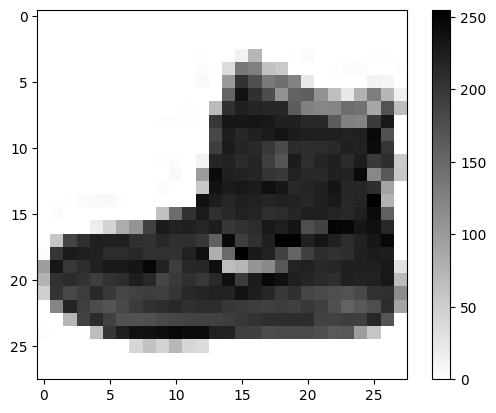

In [9]:
# We are going to display the first image in the dataset
plt.figure()
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.colorbar() #display the color bar to see the grey scale
plt.grid(False)

**Normalization**
<br>
Then we normalize the pixel values to the range 0 and 1 for both the **training** and **test** datasets (this is how the neural network model expects the input):

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Confirm that the pixel values are now between 0 and 1:

Quick note: Check the color bar and spot the difference

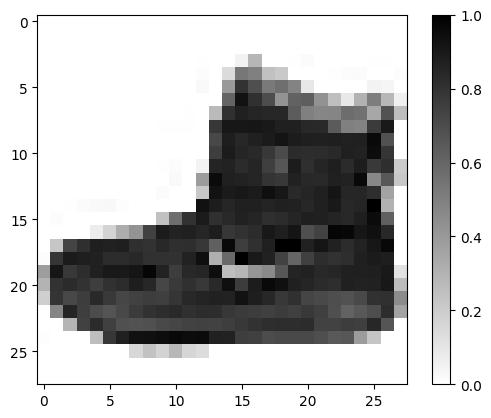

In [11]:
# Display normalized image
plt.figure()
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

**Examine some of the images in the dataset**
<br>
Display the first 25 images from the *training set* with the class name below each image and verify that the data looks good:

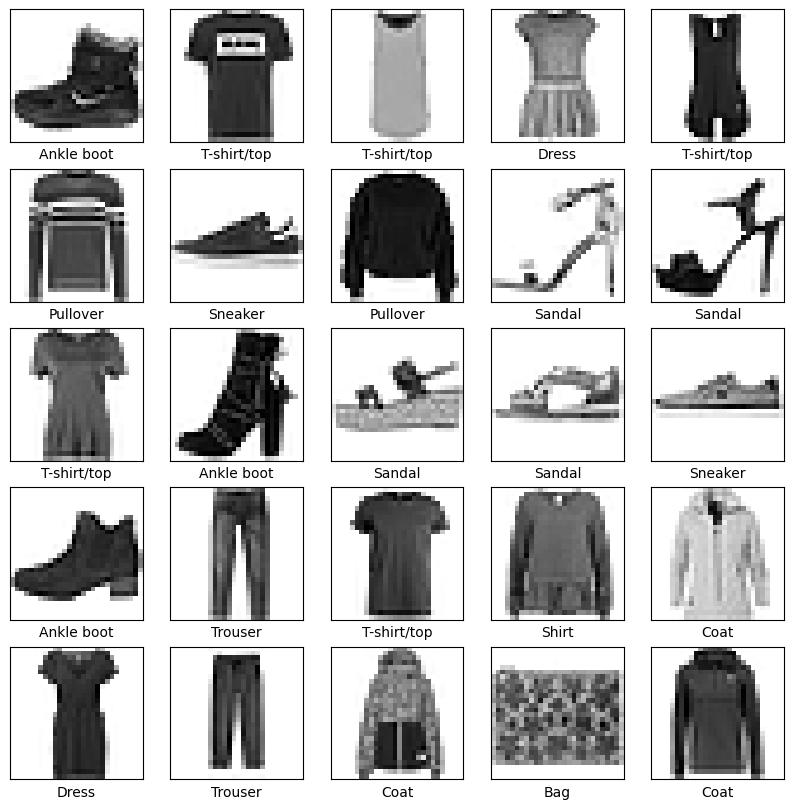

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

After checking the data, we are going to build the neural network which requires
1. setting up the layers of the model
2. compiling the model

#[Step 3] **RUN**: Setting Up the Neural Network Architecture

**Design the neural network architecture**

The basic building block of a neural network is the *layer*. Layers extract representations from the data. Create three layers:



1. First, we are going to create the model framework.
2. Next we will add the flatten later which we can input an image that is 28 * 28. This layer will flatten the image to a vector so we can pass it in to the neural network. Each pixel of the image will become an individual input that feeds in the next hidden layer
3. The next layer is a fully connected layer. Because the neurals are all close to each other, we cal it the "dense" layer . Each neuron on this layer are fully connected to the last layer. It takes the input from last layer, aggregate them and run them through a "relu" function. "Relu" is an activation function which will transform the aggregated result in each neuron
4. The next layer is our output layer. The output layer has 10 neurons because we have 10 different digits in this classification problems. We feed the results from last layer to a **softmax activation function** to output probability-like predictions for each class. The digits with the highest probability is what the algorithm thought the digit to be
5. The model is trained using sparse categorical crossentropy loss function and the ADAM gradient descent algorithm.


In [13]:
#reshape the input and output
trainX = train_images.reshape((train_images.shape[0], 28, 28, 1))
testX = test_images.reshape((test_images.shape[0], 28, 28, 1))
trainY = train_labels
testY = test_labels

**Setup The Layers**

In [14]:
def baseline_model():
    # Create a model
    model = Sequential()

    # add the convolutional layer
    # filters, size of filters,padding,activation_function,input_shape
    model.add(Conv2D(256,(3,3),padding="SAME",activation="relu",input_shape=(28,28,1)))
    # pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Conv2D(128,(3,3),padding="SAME",activation="relu"))
    # pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))

    # place a dropout layer (prevent overfitting)
    # 0.5 drop out rate is recommended, half input nodes will be dropped at each update
    model.add(Dropout(0.5))

    # model.add(Conv2D(128,(3,3),padding="SAME",activation="relu"))
    # # pooling layer
    # model.add(MaxPooling2D(pool_size=(2,2)))

    # place a dropout layer (prevent overfitting)
    # 0.5 drop out rate is recommended, half input nodes will be dropped at each update
    # model.add(Dropout(0.5))

    model.add(Flatten())
    # Add different layers to your model
    #model.add(Flatten(input_shape=(28, 28))) # DO NOT CHANGE ANYTHING IN THIS LAYER
    model.add(Dense(128, activation='relu'))

    # 0.5 drop out rate is recommended, half input nodes will be dropped at each update
    model.add(Dropout(0.5))

    #output layer
    model.add(Dense(10, activation='softmax')) # DO NOT CHANGE ANYTHING IN THIS LAYER
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

---
![APPLY](https://mooc-styleguide.s3.amazonaws.com/MOOC-Styles/Active+Learning+Headers/Links/ALH_Apply.png)
#[Step 4] **APPLY**: Convolutional Neural Network for Fashion Item Recognition

With our environment set up and data loaded, we can now train, test, and evaluate our model to recognize the fashion items. To do this, we will use the train set and test set we created to train our model.
Running the example, the accuracy on the training and validation test is printed each epoch and at the end of the classification error rate is printed.





**Create the model**

In [15]:
# Call the function we defined earlier to create the model
model = baseline_model()

#check the parameters in the model
model.summary()


/Users/piyush/workspace/projects/DeepLearning/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,101,834 (4.20 MB)

 Trainable params: 1,101,834 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

**Train the model**

In [16]:
# Train the model using the picture stored in train_images and the corresponding labels stored in train_labels

# shuffle=true will shuffle the indexes of the instances in order to allocate different sets of instances
# in validation dataset each time cross-validation runs

# validation split=0.1 means a validation dataset of size of 10% is created from the training dataset for cross validation


history = model.fit(trainX, trainY, batch_size =128, epochs=20, shuffle=True, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 242s 571ms/step - accuracy: 0.7225 - loss: 0.7695 - val_accuracy: 0.8710 - val_loss: 0.3378
Epoch 2/20
276/422 ━━━━━━━━━━━━━━━━━━━━ 1:09 474ms/step - accuracy: 0.8664 - loss: 0.3741

KeyboardInterrupt: 

Accuracy Model

In [ ]:
print(history.history.keys())


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Loss Model

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Display the model performance on the test set**

<br>
X_test include the new fashion images the model has never seen
<br>
y_test include the correct labels of the test set

## check test performance

In [ ]:
# Display the test set accuracy and loss
test_loss, test_acc = model.evaluate(testX, testY)
# Print out the accuracy
print('Test accuracy:', test_acc)

**Make predictions**

Store the predictions for all images in the test dataset:

In [ ]:
# Make predictions using the model
predictions = model.predict(testX)

Display the probabilities in the prediction of the first image. Each number in the numpy array is the probability correspond to the 10 classes

In [ ]:
# See the results (shown as probability) from the first image
predictions[0] #222 for a false prediction

Display the label that is prediced with the highest probability:

In [ ]:
# From all the probabilities the model gave us, we will select the highest one to be our final results
# argmax() will help us do that
np.argmax(predictions[0])

Confirm whether the prediction is correct by checking the actual label of the first image:

In [ ]:
# Display the actual label for the first test image
test_labels[0]

#[Step 5] **DISCUSS**: What to do next?

You will test different neural network structures, train and evaluate the model, and report the **Test accuracy** each time. Test accuracy is reported in the **"Evaluate the model"** step. Follow instructions from the assignment.

---

# Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.